# comparing models behavior with participants behavior

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns 
import ast


In [2]:
output_dir = r"15_RL_agent_TDlearn_output_behavior"
os.makedirs(output_dir, exist_ok=True)


folder_path_participants = 'data_risk_added'
folder_path_colors = '11_RL_agent_TDlearn_output/model_behavior'
folder_path_numbers = '12_RL_agent_TDlearn_output/model_behavior'
folder_path_colors_numbers = '13_RL_agent_TDlearn_output/model_behavior'


df_participants = []
df_colors = []
df_numbers = []
df_colors_numbers = []


def find_matching_csv(folder_path, df_list):
            for csv_file in os.listdir(folder_path):
                if clean_name in csv_file and csv_file.endswith('.csv'):
                    csv_path = os.path.join(folder_path, csv_file)
                    df_csv = pd.read_csv(csv_path)
                    df_list.append(df_csv)





for file_name in os.listdir(folder_path_participants):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(folder_path_participants, file_name)
        df = pd.read_excel(file_path)
        df = df[df['outcome'].str.lower() != 'na'].reset_index(drop=True)  
        df_participants.append(df)

        clean_name = file_name.removeprefix("task_data_").removesuffix(".xlsx")


        def find_matching_csv(folder_path, df_list):
            for csv_file in os.listdir(folder_path):
                if clean_name in csv_file and csv_file.endswith('.csv'):
                    csv_path = os.path.join(folder_path, csv_file)
                    df_csv = pd.read_csv(csv_path)
                    df_list.append(df_csv)


        find_matching_csv(folder_path_colors, df_colors)
        find_matching_csv(folder_path_numbers, df_numbers)
        find_matching_csv(folder_path_colors_numbers, df_colors_numbers)


In [3]:
df_participants[2].head(5)

,arrowRT,distribution,interTrialInterval,outcome,myCard,yourCard,spaceRT,totalReward,trialIndex,trialType,choice,block,timeoutRepeat,risk
0,1031,uniform,892,lose,9,2,2913,9.5,2,response,arrowdown,1,0,0.000
1,2032,uniform,908,lose,4,9,11302,9,3,response,arrowup,1,0,0.375
2,1095,uniform,898,lose,4,7,1170,8.5,4,response,arrowup,1,0,0.375
3,723,uniform,970,lose,1,5,2098,8,5,response,arrowup,1,0,0.000
4,2334,uniform,841,lose,1,3,8014,7.5,6,response,arrowup,1,0,0.000


In [4]:
df_colors[2].head(5)

,model_choices,participant_choices,model_total_reward,participant_total_reward,q_val_number_dist_choice
0,1,0,10.5,9.5,"[[-0.12318758830277177, 0.017210915918264024],..."
1,1,1,10.0,9.0,"[[-0.12318758830277177, -0.12313376533904684],..."
2,0,1,10.5,8.5,"[[-0.12318758830277177, -0.22539605322257034],..."
3,0,1,11.0,8.0,"[[-0.12318758830277177, -0.29990956830191634],..."
4,0,1,11.5,7.5,"[[-0.12318758830277177, -0.3542039132104122], ..."


# in the last column above, it should've been q_val_color_dist_choice, it's a little bug in my previous code


In [5]:
df_numbers[2].head()

,model_choices,participant_choices,model_total_reward,participant_total_reward,q_val_number_dist_choice
0,1,0,10.5,9.5,"[[-0.005792409243647113, -0.000350054378464420..."
1,0,1,11.0,9.0,"[[-0.005792409243647113, -0.000350054378464420..."
2,0,1,11.5,8.5,"[[-0.005792409243647113, -0.000350054378464420..."
3,0,1,12.0,8.0,"[[-0.005792409243647113, -0.03881306213837156]..."
4,0,1,12.5,7.5,"[[-0.005792409243647113, -0.07431519102917689]..."


In [6]:
df_colors_numbers[2].head(5)

,model_choices,participant_choices,model_total_reward,participant_total_reward,q_val_number_dist_choice
0,1,0,10.5,9.5,"[[[-0.02041655793053316, -0.000694440745936502..."
1,0,1,11.0,9.0,"[[[-0.02041655793053316, -0.000694440745936502..."
2,0,1,11.5,8.5,"[[[-0.02041655793053316, -0.000694440745936502..."
3,0,1,12.0,8.0,"[[[-0.02041655793053316, -0.12641074077329204]..."
4,0,1,12.5,7.5,"[[[-0.02041655793053316, -0.22047390215708967]..."


# total reward:

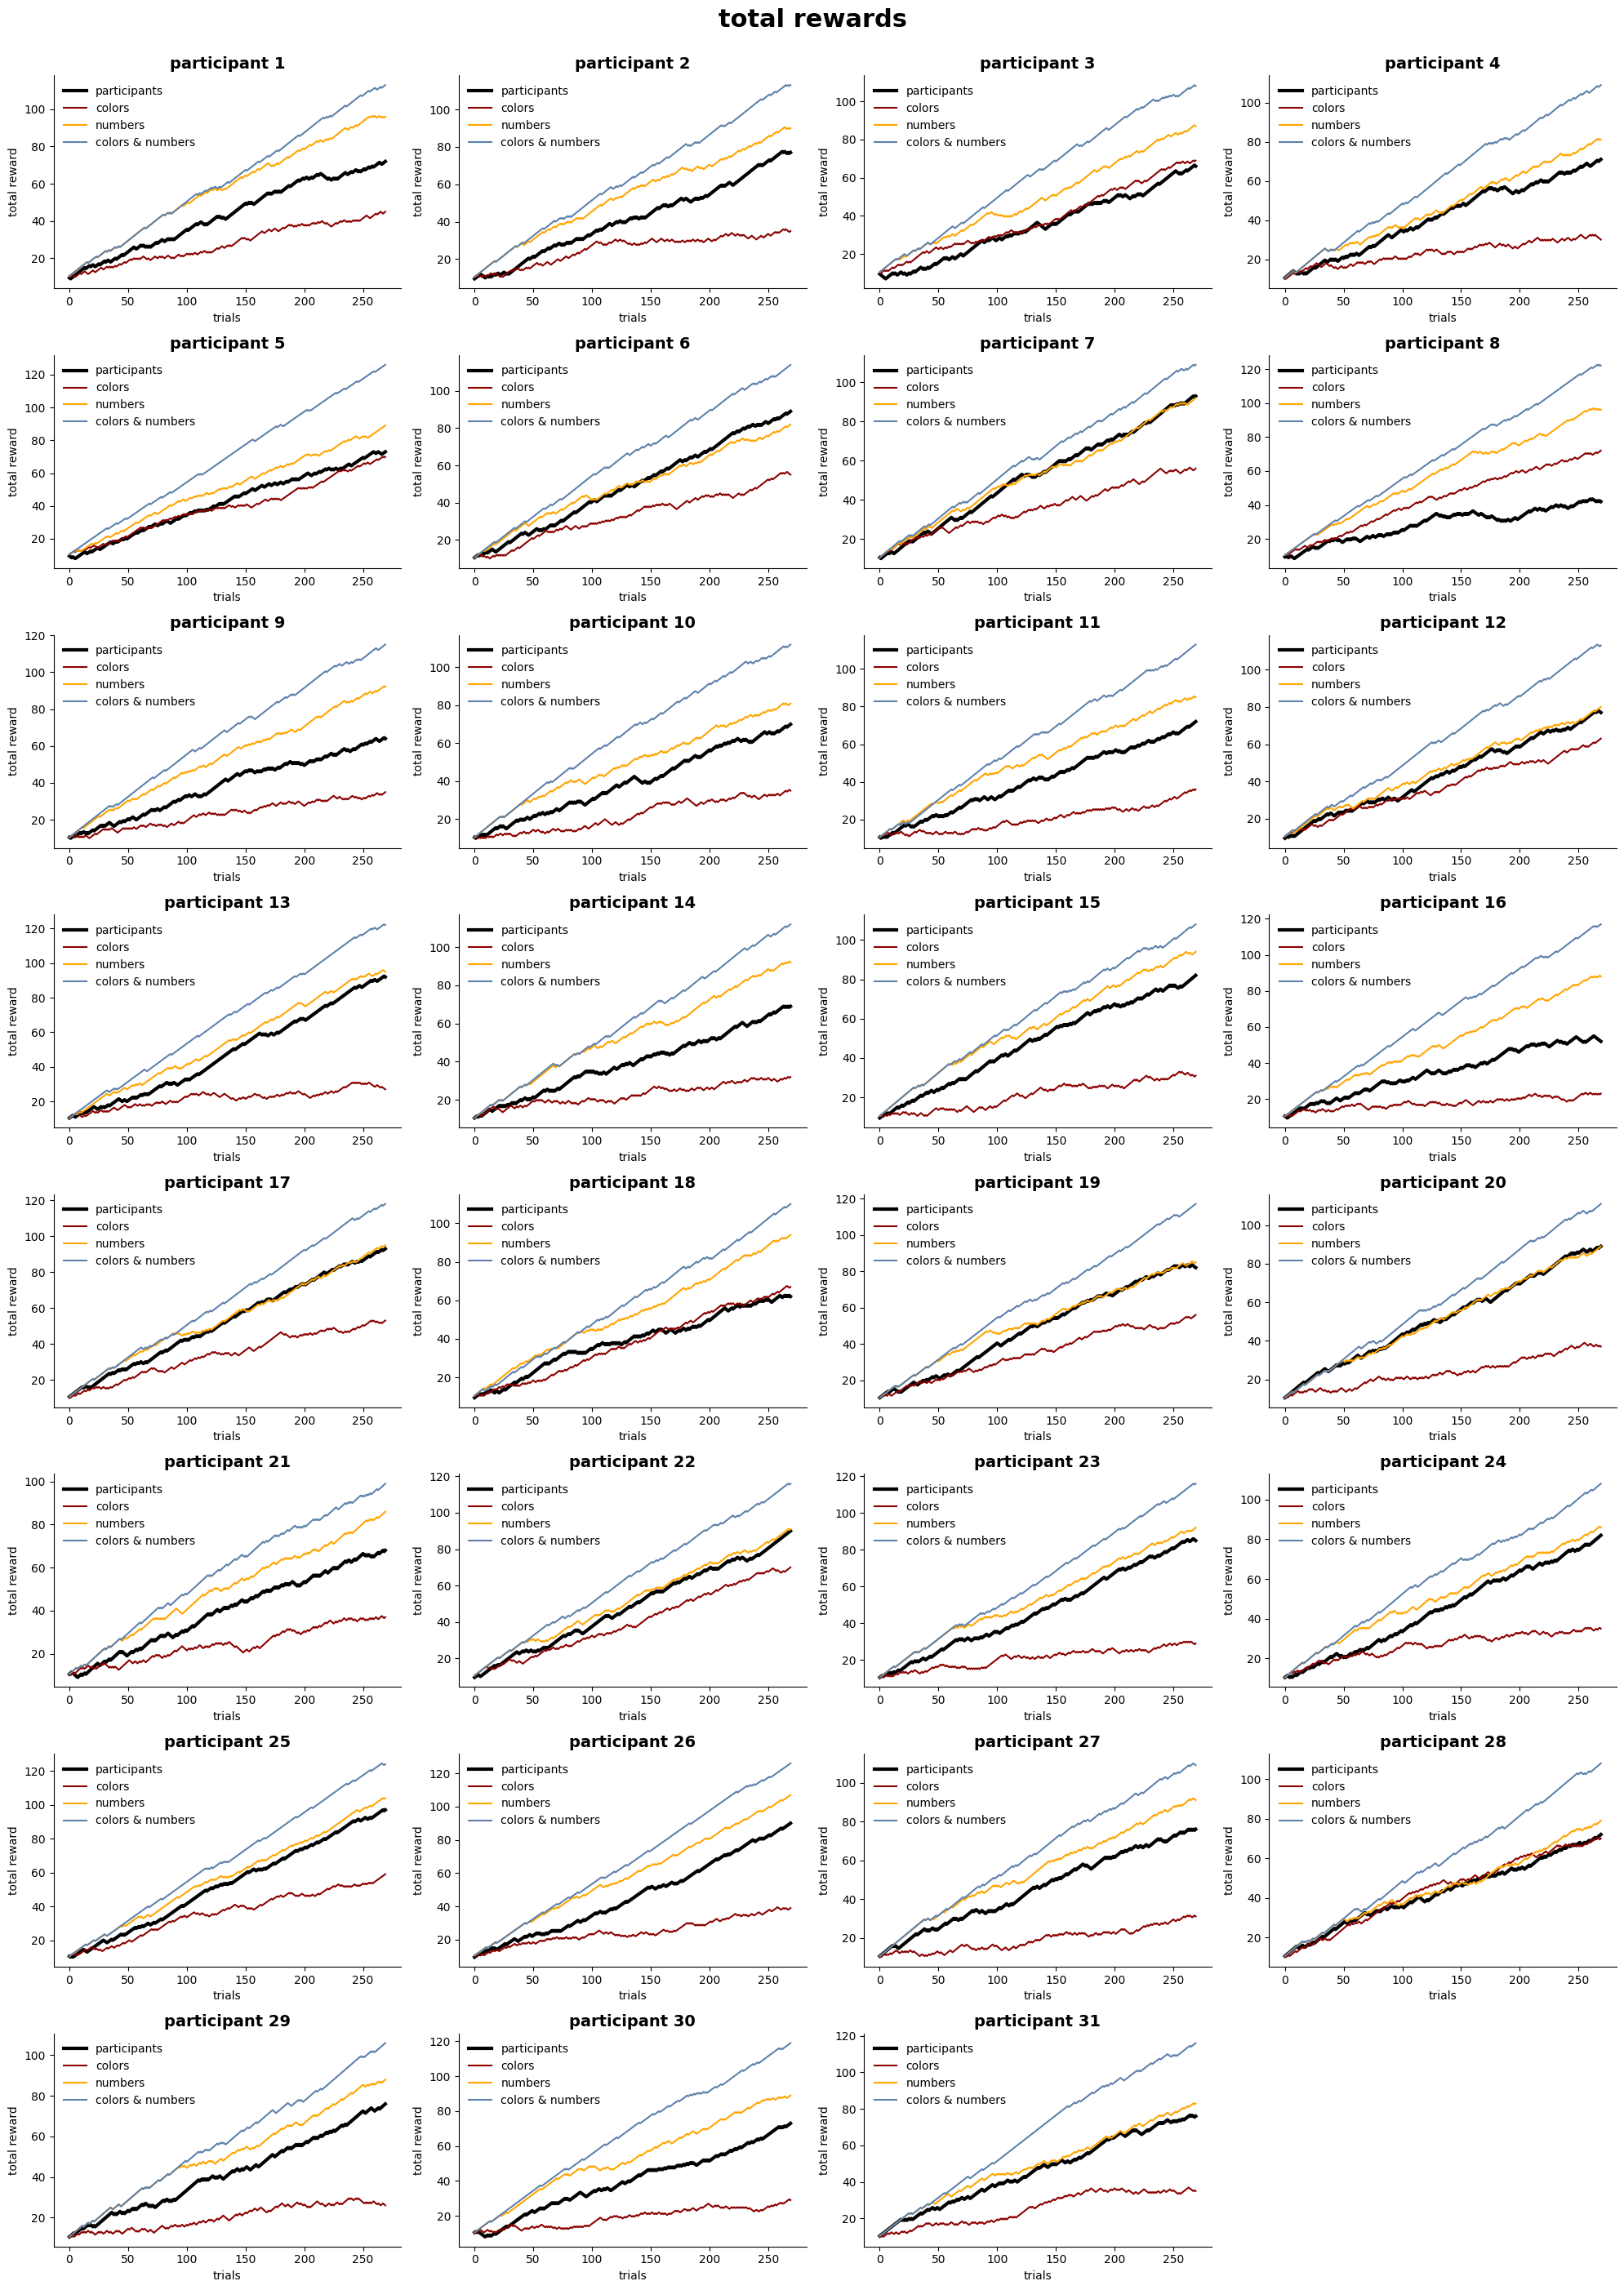

In [7]:
num_subplots = len(df_participants)
trial_num = len(df_participants[0])

fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(20, 28))
axes = axes.flatten()


colors = ['black', '#8b0000', 'orange', '#5e81ac']
labels = ['participants', 'colors', 'numbers', 'colors & numbers']

for i in range(num_subplots):
    ax = axes[i]

    ax.plot(range(trial_num), df_participants[i]['totalReward'], label=labels[0], color=colors[0], linewidth=3)
    ax.plot(range(trial_num), df_colors[i]['model_total_reward'], label=labels[1], color=colors[1])
    ax.plot(range(trial_num), df_numbers[i]['model_total_reward'], label=labels[2], color=colors[2])
    ax.plot(range(trial_num), df_colors_numbers[i]['model_total_reward'], label=labels[3], color=colors[3])

    ax.set_title(f'participant {i+1}' , fontsize=14, fontweight='bold')
    ax.set_xlabel('trials')
    ax.set_ylabel('total reward')
    ax.legend(frameon=False)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

for j in range(num_subplots, len(axes)):
    fig.delaxes(axes[j])
    
fig.suptitle('total rewards', fontsize=22, fontweight='bold', y=1)

plt.tight_layout(rect=[0, 0, 1, 1]) 

filename = os.path.join(output_dir, "total_reward.pdf")
plt.savefig(filename, format='pdf')

plt.show()


# q-val trends colors model:
I wanna find delta_q vals for arrow up and arrowdown.
 each q_val_number_dist_choice column has q val matrices that are 3 x 2. For 3 uniform, low, high distributions and arrow down and arrow up actions. this is the map from code 11:

distributions_map = { "uniform": 0, "low": 1,  "high": 2}

actions = { "arrowdown": 0, "arrowup": 1}


# do this based on the debug below:

# debug

In [ ]:
df_sample = df_colors[2]
aaa = df_sample.loc[0, "q_val_number_dist_choice"]
aaa_list = ast.literal_eval(aaa)
shape = np.shape(aaa_list)
print("Length of aaa_list:", shape)


Length of aaa_list: (3, 2)


In [17]:
df_sample = df_numbers[2]
aaa = df_sample.loc[0, "q_val_number_dist_choice"]
aaa_list = ast.literal_eval(aaa)
shape = np.shape(aaa_list)
print("Length of aaa_list:", shape)


Length of aaa_list: (9, 2)


In [20]:
df_sample = df_colors_numbers[2]
aaa = df_sample.loc[0, "q_val_number_dist_choice"]
aaa_list = ast.literal_eval(aaa)
shape = np.shape(aaa_list)
print("Length of aaa_list:", shape)


Length of aaa_list: (9, 3, 2)
